In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error, explained_variance_score

In [2]:
df = pd.read_csv("Walmart.csv")

In [3]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
df['Holiday_Flag'].value_counts()

0    5985
1     450
Name: Holiday_Flag, dtype: int64

In [5]:
type(df['Date'])

pandas.core.series.Series

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [7]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [8]:
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [10]:
df['weekday'] = df.Date.dt.weekday
df['month'] = df.Date.dt.month
df['year'] = df.Date.dt.year

df.drop(['Date'],axis=1, inplace=True)

In [11]:
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,6,5,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,3,12,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,0,5,2010


In [12]:
df.nunique().sort_values()

Holiday_Flag       2
year               3
weekday            7
month             12
Store             45
Unemployment     349
Fuel_Price       892
CPI             2145
Temperature     3528
Weekly_Sales    6435
dtype: int64

In [13]:
#stores with highest weekly sales

df.groupby(['Store'])['Weekly_Sales'].sum().sort_values(ascending=False).head()

Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
Name: Weekly_Sales, dtype: float64

<AxesSubplot:xlabel='Store'>

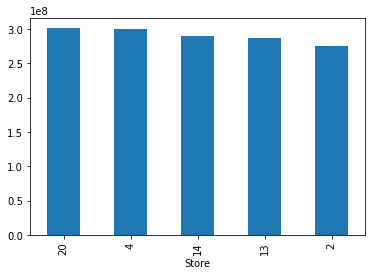

In [14]:
df.groupby(['Store'])['Weekly_Sales'].sum().sort_values(ascending=False).head().plot(kind='bar')

<AxesSubplot:xlabel='Store'>

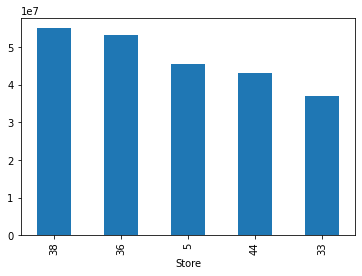

In [15]:
#stores with lowest sales

df.groupby(['Store'])['Weekly_Sales'].sum().sort_values(ascending=False).tail().plot(kind='bar')

<AxesSubplot:xlabel='year'>

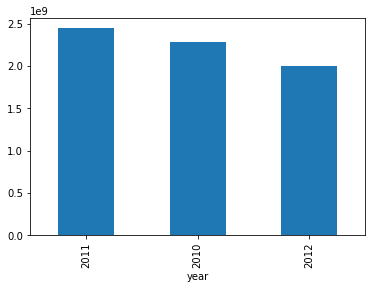

In [16]:
df.groupby(['year'])['Weekly_Sales'].sum().sort_values(ascending=False).head().plot(kind='bar')

array([[<AxesSubplot:title={'center':'Store'}>,
        <AxesSubplot:title={'center':'Weekly_Sales'}>,
        <AxesSubplot:title={'center':'Holiday_Flag'}>],
       [<AxesSubplot:title={'center':'Temperature'}>,
        <AxesSubplot:title={'center':'Fuel_Price'}>,
        <AxesSubplot:title={'center':'CPI'}>],
       [<AxesSubplot:title={'center':'Unemployment'}>,
        <AxesSubplot:title={'center':'weekday'}>,
        <AxesSubplot:title={'center':'month'}>],
       [<AxesSubplot:title={'center':'year'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

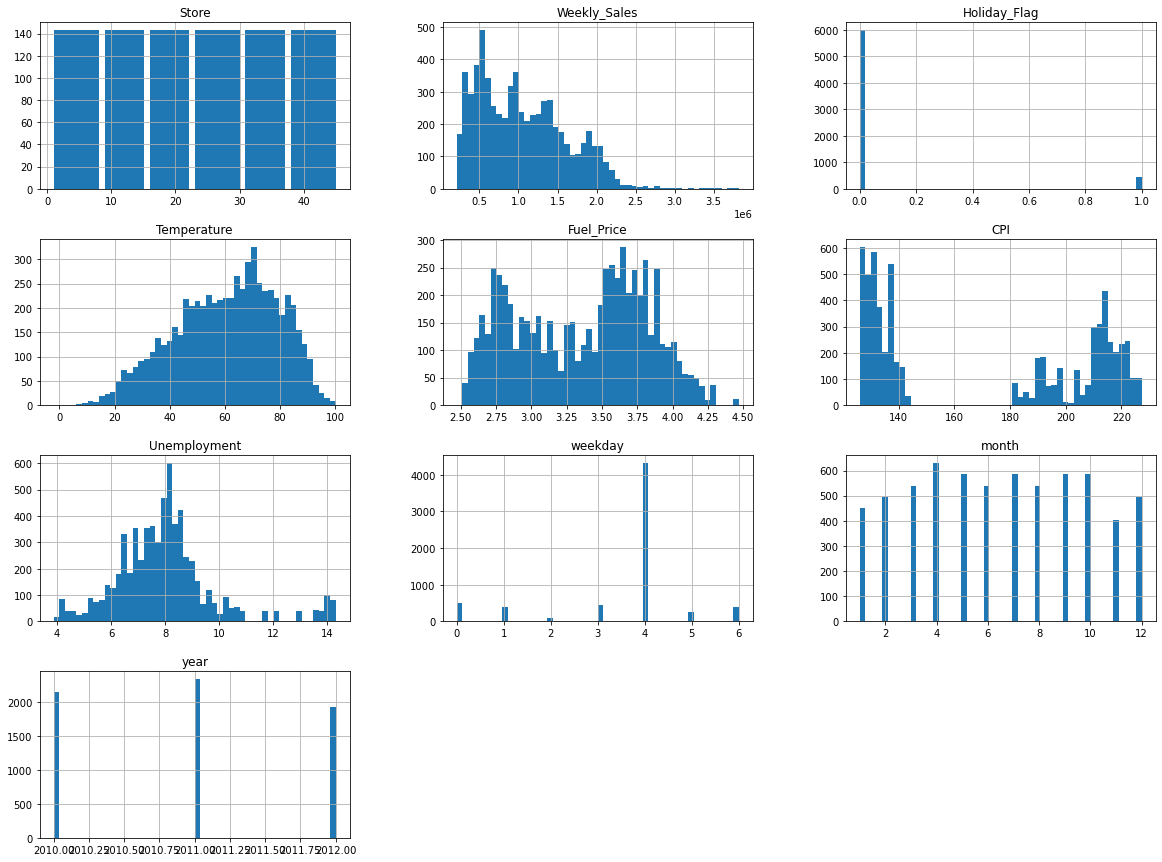

In [17]:
df.hist(bins=50, figsize=(20,15))

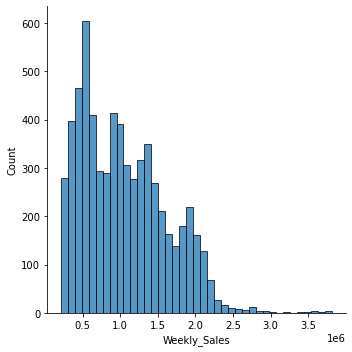

In [18]:
sns.displot(df['Weekly_Sales'])

In [19]:
df.corr()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year
Store,1.000000e+00,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531,-2.243183e-15,6.289676e-16,3.474318e-12
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176,-2.104085e-02,6.753523e-02,-1.837754e-02
Holiday_Flag,-4.386841e-16,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960,-9.100474e-02,3.322341e-01,-5.678257e-02
Temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158,1.833136e-02,6.643970e-02,6.426923e-02
Fuel_Price,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684,-2.651216e-02,-5.283174e-02,7.794703e-01
CPI,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020,-9.595877e-03,1.478843e-03,7.479573e-02
Unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000,3.777320e-02,-2.061552e-03,-2.418135e-01
weekday,-2.243183e-15,-0.021041,-9.100474e-02,0.018331,-0.026512,-0.009596,0.037773,1.000000e+00,-1.387259e-01,-9.923791e-02
month,6.289676e-16,0.067535,3.322341e-01,0.066440,-0.052832,0.001479,-0.002062,-1.387259e-01,1.000000e+00,-1.390145e-01
year,3.474318e-12,-0.018378,-5.678257e-02,0.064269,0.779470,0.074796,-0.241813,-9.923791e-02,-1.390145e-01,1.000000e+00


<AxesSubplot:>

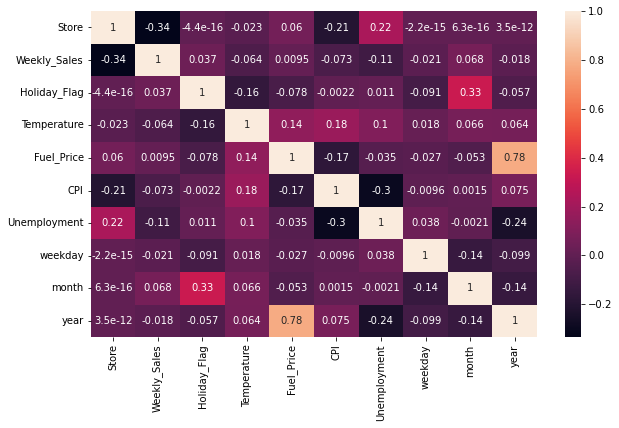

In [20]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

/opt/anaconda3/envs/Learnings/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Store', ylabel='Weekly_Sales'>

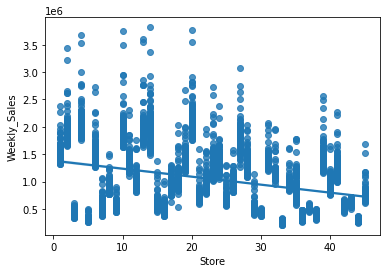

In [21]:
sns.regplot('Store','Weekly_Sales', df)

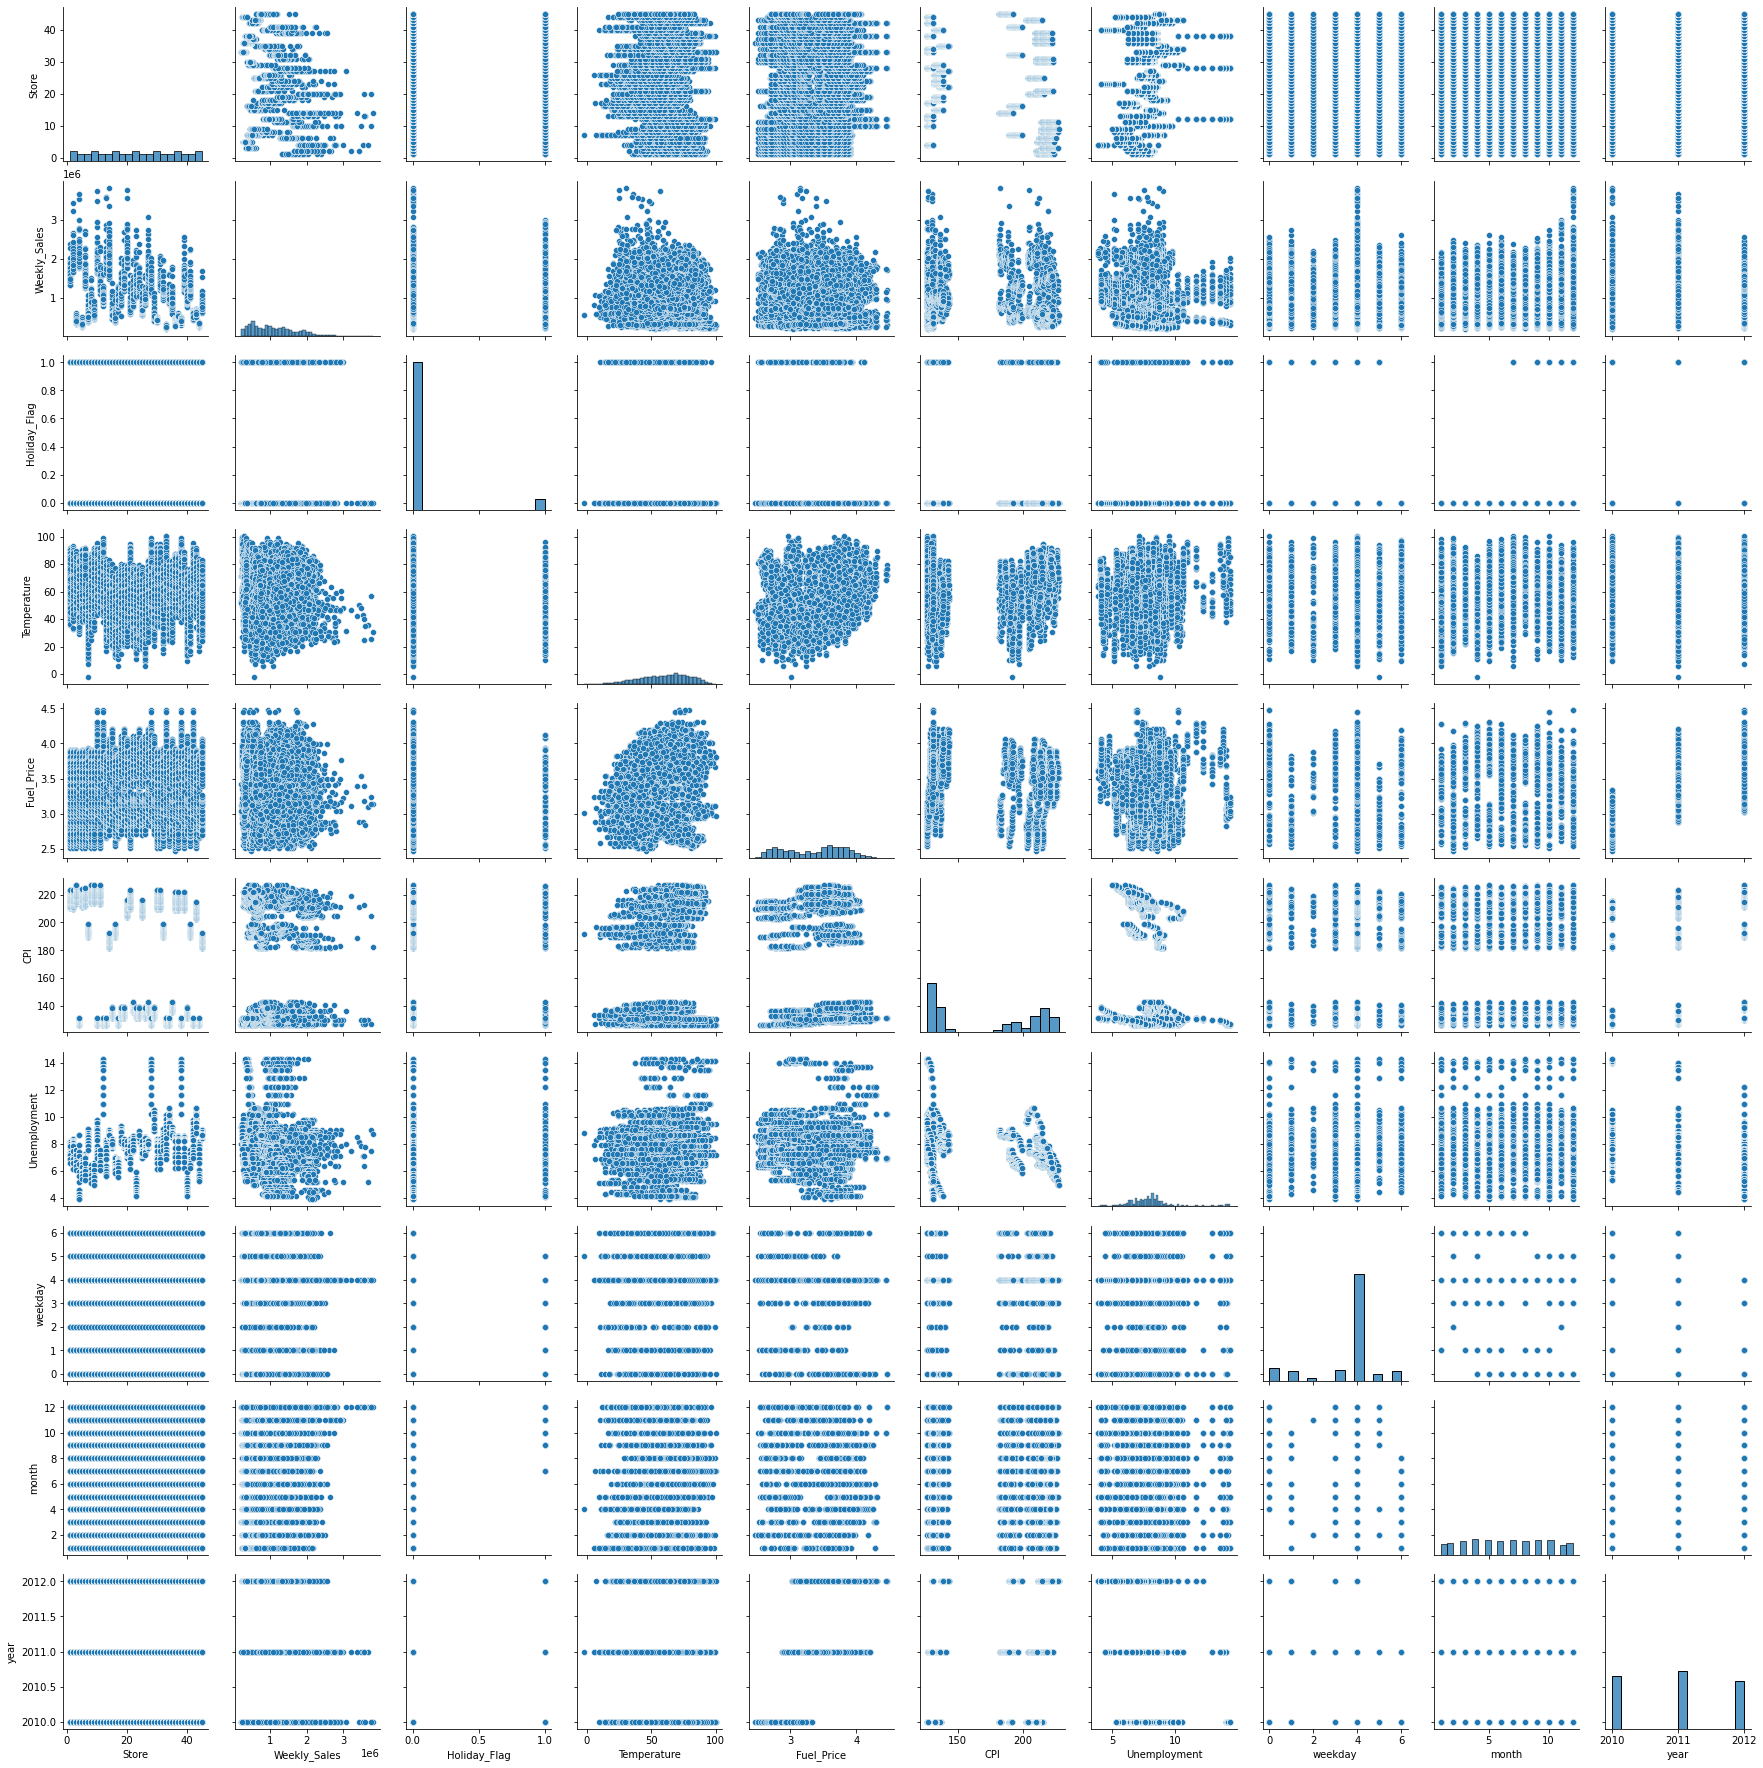

In [22]:
sns.pairplot(df)

In [23]:
df.shape

(6435, 10)

In [24]:
df1 = df

In [25]:
#Fixing any duplicate rows

rs, cs = df1.shape

df.drop_duplicates(inplace=True)

if df.shape==(rs,cs):
    print("This dataset has no duplicates")
else:
    print("Number of duplicates fixed:{}".format(rs-df.shape[0]))

This dataset has no duplicates


In [26]:
df.columns

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment', 'weekday', 'month', 'year'],
      dtype='object')

In [27]:
df = pd.get_dummies(df, columns=["Store", "Holiday_Flag", "weekday", "month", "year"], drop_first=True)

In [28]:
df.head()

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Store_2,Store_3,Store_4,Store_5,Store_6,...,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,year_2011,year_2012
0,1643690.90,42.31,2.572,211.096358,8.106,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1641957.44,38.51,2.548,211.242170,8.106,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1611968.17,39.93,2.514,211.289143,8.106,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1409727.59,46.63,2.561,211.319643,8.106,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1554806.68,46.50,2.625,211.350143,8.106,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [29]:
fea = ["Temperature", "Fuel_Price", "CPI", "Unemployment"]

In [30]:
sc = StandardScaler()
df[fea] = sc.fit_transform(df[fea])

In [31]:
df.head()

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Store_2,Store_3,Store_4,Store_5,Store_6,...,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,year_2011,year_2012
0,1643690.90,-0.995136,-1.713800,1.004175,0.056964,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1641957.44,-1.201170,-1.766089,1.007880,0.056964,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1611968.17,-1.124178,-1.840166,1.009074,0.056964,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1409727.59,-0.760907,-1.737766,1.009849,0.056964,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1554806.68,-0.767955,-1.598328,1.010624,0.056964,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [32]:
df.columns

Index(['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
       'Store_2', 'Store_3', 'Store_4', 'Store_5', 'Store_6', 'Store_7',
       'Store_8', 'Store_9', 'Store_10', 'Store_11', 'Store_12', 'Store_13',
       'Store_14', 'Store_15', 'Store_16', 'Store_17', 'Store_18', 'Store_19',
       'Store_20', 'Store_21', 'Store_22', 'Store_23', 'Store_24', 'Store_25',
       'Store_26', 'Store_27', 'Store_28', 'Store_29', 'Store_30', 'Store_31',
       'Store_32', 'Store_33', 'Store_34', 'Store_35', 'Store_36', 'Store_37',
       'Store_38', 'Store_39', 'Store_40', 'Store_41', 'Store_42', 'Store_43',
       'Store_44', 'Store_45', 'Holiday_Flag_1', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12', 'year_2011',
       'year_2012'],
      dtype='object')

In [35]:
X = df.iloc[:,1:]
y = df["Weekly_Sales"]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [42]:
lr = LinearRegression()

In [43]:
lr.fit(X_train, y_train)

LinearRegression()

In [44]:
lr_pred = lr.predict(X_test)

In [49]:
print(mean_squared_error(y_test, lr_pred))

26669312354.310207


In [50]:
print(explained_variance_score(y_test, lr_pred))

0.9234969604451702


In [51]:
rf = RandomForestRegressor()

In [52]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [53]:
rf_pred = rf.predict(X_test)

In [54]:
explained_variance_score(y_test, rf_pred)

0.9327840523921076

In [55]:
mean_squared_error(y_test, rf_pred)

23310161846.64091

In [57]:
feature_importances = pd.DataFrame(rf.feature_importances_, index = X.columns, 
                                   columns=['importance']).sort_values('importance', ascending=False).head()

feature_importances

,importance
Store_20,0.084400
Store_4,0.081948
Store_14,0.076251
Store_13,0.069686
Store_2,0.065044
